In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(device)
print(torch.cuda.get_device_name(0))

cuda
NVIDIA GeForce RTX 4060 Laptop GPU


In [3]:
torch.manual_seed(42)

In [3]:
#Transform Class
transforms=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

Load_Data_Sets

In [4]:
Datasets=datasets.ImageFolder(root="D:/Project-to-learn/Agriculture_Potato_Disease_Classification/Data",transform=transforms)
# img,label=Datasets[0]
# img.shape
# Datasets[0][0]
classes=Datasets.classes
print("Classes:",classes)

Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


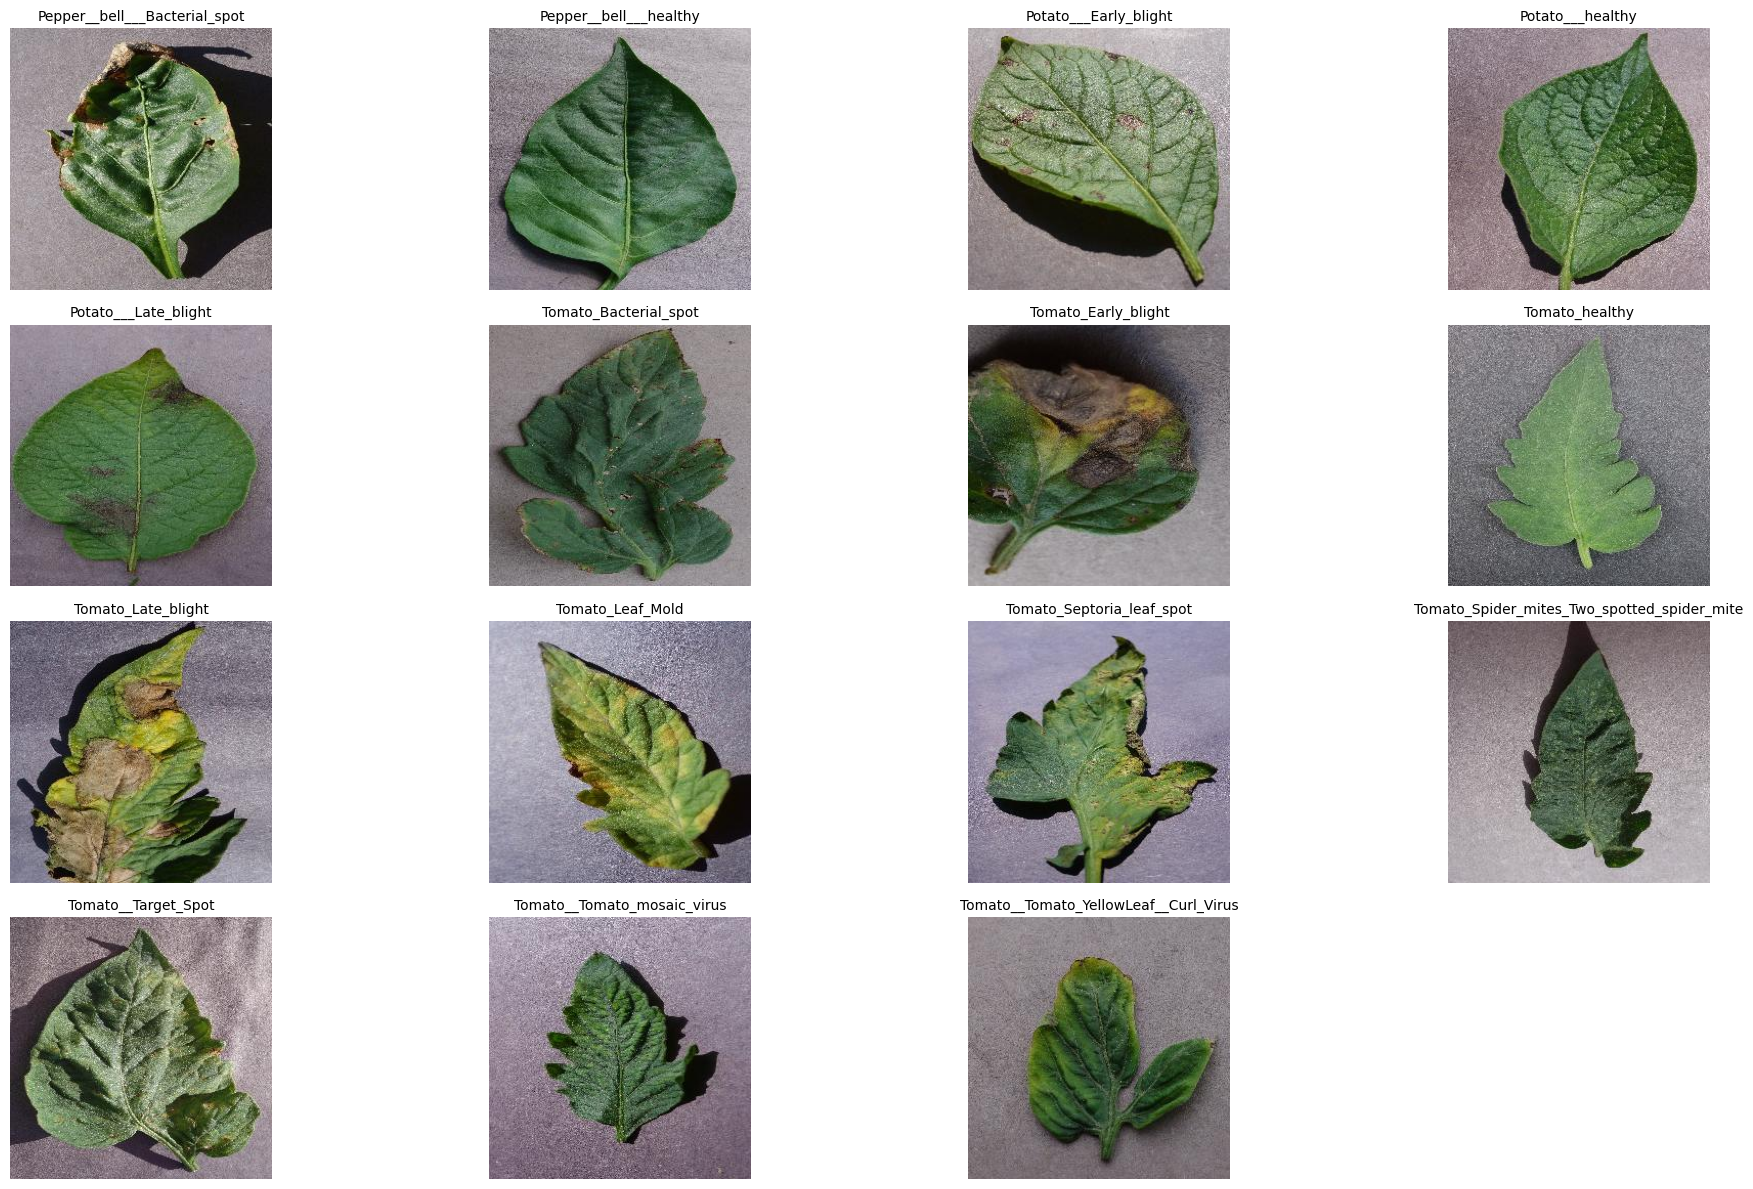

In [15]:
import os
import random
from PIL import Image

data_dir= "D:/Project-to-learn/Agriculture_Potato_Disease_Classification/Data"
classes=os.listdir(data_dir)
plt.figure(figsize=(20,12))
for i ,cls in enumerate(classes):
    cls_path=os.path.join(data_dir,cls)
    img_name=random.choice(os.listdir(cls_path))
    img_path=os.path.join(cls_path,img_name)

    img=Image.open(img_path)

    plt.subplot(4,4,i+1)
    plt.imshow(img)
    plt.title(cls,fontsize=10)
    plt.axis("off")
plt.tight_layout()
plt.show()


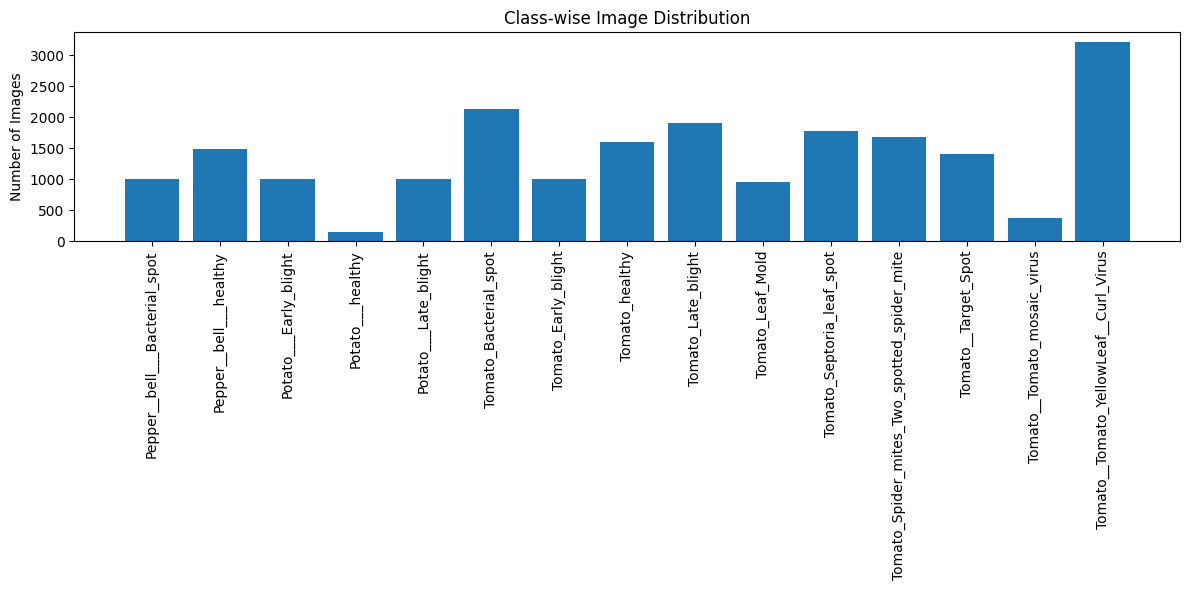

In [ ]:
class_counts = {
    cls: len(os.listdir(os.path.join(data_dir, cls)))
    for cls in classes
}

plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.title("Class-wise Image Distribution")
plt.tight_layout()
plt.show()
    

In [18]:
from torch.utils.data import random_split
train_size=int(0.8*len(Datasets))
val_size=len(Datasets)-train_size
train_dataset,val_dataset=random_split(Datasets,[train_size,val_size])

In [ ]:
print("Training images: ",len(train_dataset))
print("Validation images: ",len(val_dataset)
)

Training images:  16510
Validation images:  4128


In [19]:
#Data_Loaders

train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
val_loader=DataLoader(val_dataset,batch_size=32,shuffle=False)

In [20]:
for x,y in train_loader:
    print(x.shape,y.shape)
    break

torch.Size([32, 3, 224, 224]) torch.Size([32])


In [21]:
# --- 5. Inspect a Batch (Optional) ---
# Let's see what the DataLoader gives us.
# next(iter(...)) gets one batch.
images, labels = next(iter(train_loader))

print(f"\n--- Inspecting one batch ---")
print(f"Images batch shape: {images.shape}")
print(f"Labels batch shape: {labels.shape}")
print(f"Example labels: {labels}")


--- Inspecting one batch ---
Images batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])
Example labels: tensor([10,  5,  8,  6,  6, 12,  2,  1, 12, 11,  5, 12, 12, 12, 11,  5, 12,  5,
         6,  2,  5, 11, 10,  3,  9,  1,  2,  7,  7,  2,  8,  6])


In [5]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),   
        )

        self.gap = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Sequential(
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.gap(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)


Trainig Setup

In [23]:
num_classes = len(classes)
num_classes

15

In [24]:
model = CNN(num_classes)
model.to(device)

CNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (gap): AdaptiveAvgPool2d(output_size=1)
  (classifier): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5

In [25]:
criterion = nn.CrossEntropyLoss()   # correct for multi-class
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode="min",
    factor=0.5,
    patience=2
)

In [26]:
epochs = 15
patience = 4
best_val_loss = float("inf")
counter = 0

In [27]:
from tqdm import tqdm
import time
from sklearn.metrics import classification_report

train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(epochs):
    start_time = time.time()

    # ================= TRAINING =================
    model.train()
    total_epoch_loss = 0.0
    correct = 0
    total = 0

    for batch_features, batch_labels in tqdm(
        train_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]"
    ):
        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device)

        optimizer.zero_grad()

        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)

        loss.backward()

        # Gradient clipping (stability)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()

        total_epoch_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

    avg_train_loss = total_epoch_loss / len(train_loader)
    train_accuracy = 100 * correct / total

    train_loss_list.append(avg_train_loss)
    train_acc_list.append(train_accuracy)

    # ================= VALIDATION =================
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for val_features, val_labels in tqdm(
            val_loader, desc=f"Epoch {epoch+1}/{epochs} [Val]"
        ):
            val_features = val_features.to(device)
            val_labels = val_labels.to(device)

            val_outputs = model(val_features)
            v_loss = criterion(val_outputs, val_labels)

            val_loss += v_loss.item()

            _, v_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (v_predicted == val_labels).sum().item()

            all_preds.extend(v_predicted.cpu().numpy())
            all_labels.extend(val_labels.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total

    val_loss_list.append(avg_val_loss)
    val_acc_list.append(val_accuracy)

    # Scheduler step
    scheduler.step(avg_val_loss)

    # ================= EARLY STOPPING =================
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
        torch.save(model.state_dict(), "final_model.pth")
    else:
        counter += 1

    epoch_time = time.time() - start_time

    # ================= LOGGING =================
    print(
        f"Epoch [{epoch+1}/{epochs}] "
        f"- Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}% "
        f"- Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}% "
        f"- Time: {epoch_time:.2f}s"
    )

    if counter >= patience:
        print("Early stopping triggered")
        break
# ================= FINAL EVALUATION =================
print("\nClassification Report (Validation Set):")
print(classification_report(all_labels, all_preds, target_names=classes))

Epoch 1/15 [Val]: 100%|██████████| 129/129 [01:03<00:00,  2.04it/s]


Epoch [1/15] - Train Loss: 1.4552, Train Acc: 53.52% - Val Loss: 0.8899, Val Acc: 71.15% - Time: 292.79s


Epoch 2/15 [Val]: 100%|██████████| 129/129 [00:09<00:00, 13.89it/s]


Epoch [2/15] - Train Loss: 0.9340, Train Acc: 69.81% - Val Loss: 0.6562, Val Acc: 78.78% - Time: 87.48s


Epoch 3/15 [Val]: 100%|██████████| 129/129 [00:18<00:00,  7.05it/s]


Epoch [3/15] - Train Loss: 0.7641, Train Acc: 74.92% - Val Loss: 0.5274, Val Acc: 83.09% - Time: 92.65s


Epoch 4/15 [Val]: 100%|██████████| 129/129 [00:17<00:00,  7.28it/s]


Epoch [4/15] - Train Loss: 0.6683, Train Acc: 78.11% - Val Loss: 0.4628, Val Acc: 84.91% - Time: 101.32s


Epoch 5/15 [Val]: 100%|██████████| 129/129 [00:13<00:00,  9.54it/s]


Epoch [5/15] - Train Loss: 0.5900, Train Acc: 81.10% - Val Loss: 0.4040, Val Acc: 86.99% - Time: 97.86s


Epoch 6/15 [Val]: 100%|██████████| 129/129 [00:12<00:00, 10.41it/s]


Epoch [6/15] - Train Loss: 0.5399, Train Acc: 82.36% - Val Loss: 0.5837, Val Acc: 80.45% - Time: 92.97s


Epoch 7/15 [Val]: 100%|██████████| 129/129 [00:18<00:00,  7.10it/s]


Epoch [7/15] - Train Loss: 0.4754, Train Acc: 84.79% - Val Loss: 0.3079, Val Acc: 90.62% - Time: 102.86s


Epoch 8/15 [Val]: 100%|██████████| 129/129 [00:17<00:00,  7.18it/s]


Epoch [8/15] - Train Loss: 0.4294, Train Acc: 85.92% - Val Loss: 0.3740, Val Acc: 87.98% - Time: 101.81s


Epoch 9/15 [Val]: 100%|██████████| 129/129 [00:18<00:00,  7.01it/s]


Epoch [9/15] - Train Loss: 0.4080, Train Acc: 86.49% - Val Loss: 0.2984, Val Acc: 90.24% - Time: 103.32s


Epoch 10/15 [Val]: 100%|██████████| 129/129 [00:18<00:00,  6.88it/s]


Epoch [10/15] - Train Loss: 0.3794, Train Acc: 87.18% - Val Loss: 0.3093, Val Acc: 90.07% - Time: 103.39s


Epoch 11/15 [Val]: 100%|██████████| 129/129 [00:18<00:00,  6.86it/s]


Epoch [11/15] - Train Loss: 0.3662, Train Acc: 88.04% - Val Loss: 0.2215, Val Acc: 92.71% - Time: 97.67s


Epoch 12/15 [Val]: 100%|██████████| 129/129 [00:18<00:00,  6.90it/s]


Epoch [12/15] - Train Loss: 0.3445, Train Acc: 88.79% - Val Loss: 0.2307, Val Acc: 92.73% - Time: 105.60s


Epoch 13/15 [Val]: 100%|██████████| 129/129 [00:18<00:00,  6.95it/s]


Epoch [13/15] - Train Loss: 0.3290, Train Acc: 89.16% - Val Loss: 0.2076, Val Acc: 93.44% - Time: 103.41s


Epoch 14/15 [Val]: 100%|██████████| 129/129 [00:18<00:00,  6.96it/s]


Epoch [14/15] - Train Loss: 0.3086, Train Acc: 89.65% - Val Loss: 0.1780, Val Acc: 94.50% - Time: 104.42s


Epoch 15/15 [Val]: 100%|██████████| 129/129 [00:18<00:00,  6.85it/s]

Epoch [15/15] - Train Loss: 0.3024, Train Acc: 90.13% - Val Loss: 0.2245, Val Acc: 93.19% - Time: 104.78s

Classification Report (Validation Set):
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.96      0.93      0.94       205
                     Pepper__bell___healthy       0.83      1.00      0.90       323
                      Potato___Early_blight       0.91      0.98      0.94       190
                           Potato___healthy       0.96      0.85      0.90       194
                       Potato___Late_blight       1.00      0.12      0.22        32
                      Tomato_Bacterial_spot       0.96      0.97      0.96       428
                        Tomato_Early_blight       0.88      0.81      0.84       195
                             Tomato_healthy       0.94      0.85      0.89       380
                         Tomato_Late_blight       0.96      0.94      0.95       194
  

In [28]:
model.eval()  # turn off dropout, batchnorm, etc.

CNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (gap): AdaptiveAvgPool2d(output_size=1)
  (classifier): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5

In [29]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X, y in val_loader:
        # MOve the data to the same device as the model
        X = X.to(device)
        y = y.to(device)
        outputs = model(X)
        _, predicted = torch.max(outputs, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

accuracy = 100 * correct / total
print("Validation Accuracy:", accuracy)


Validation Accuracy: 93.19282945736434


In [30]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X, y in train_loader:
        # MOve the data to the same device as the model
        X = X.to(device)
        y = y.to(device)
        outputs = model(X)
        _, predicted = torch.max(outputs, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

accuracy = 100 * correct / total
print("Validation Accuracy:", accuracy)


Validation Accuracy: 94.0642035130224


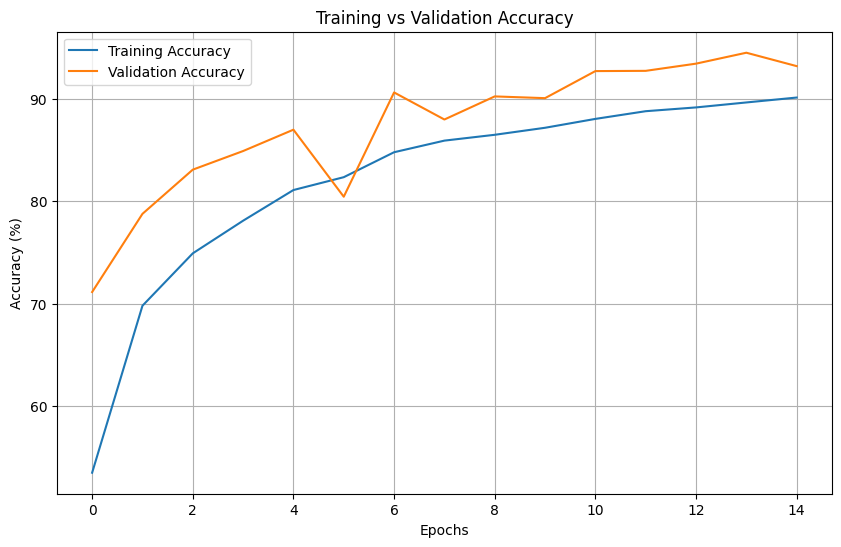

In [31]:
plt.figure(figsize=(10,6))
plt.plot(train_acc_list, label='Training Accuracy')
plt.plot(val_acc_list, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

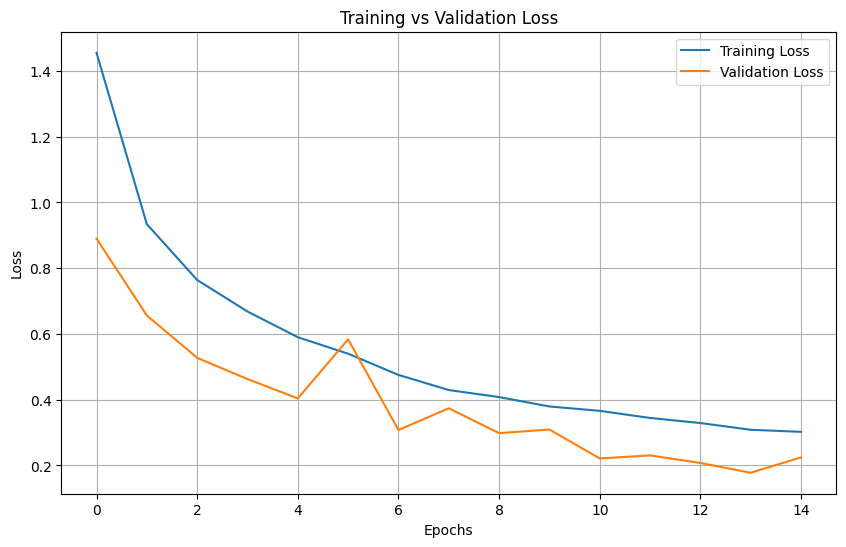

In [32]:
plt.figure(figsize=(10,6))
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
# torch.save(model.state_dict(), "final_model.pth")


In [ ]:
model = CNN(len(classes))                      # your CNN class
model.load_state_dict(torch.load("final_model.pth", map_location="cpu"))
model.eval()

FileNotFoundError: [Errno 2] No such file or directory: 'best_model.pth'

In [ ]:
# torch.save(model.state_dict(), "final_model.pth")

In [ ]:
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

def predict(image_path):
    image = Image.open(image_path,).convert("RGB")
    image = transforms(image).unsqueeze(0)  # add batch dimension

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    print(f"\n🧠 Predicted : {classes[predicted.item()]}")
    return classes[predicted.item()]


In [ ]:
predict("D:\Project-to-learn\Agriculture_Potato_Disease_Classification\model\potato-diseases.jpg")


🧠 Predicted : Pepper__bell___Bacterial_spot


'Pepper__bell___Bacterial_spot'